# COMPARISON OF HEIGHTS BETWEEN FAMILY MEMBERS

In this analysis, we use a dataset of 163 families which consists of the columns:
<br>
**FAMILY S.NO.** | **MEMBER** | **AGE** | **HEIGHT**

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('/home/zeborg/KRMU/SEM-3/USING DATA IN EVERYDAY LIFE/Height_Data_Merged.xlsx')
df.drop(columns=['Unnamed: 4','Unnamed: 5'], inplace=True)
df['MEMBER']=df['MEMBER'].str.upper()
df

,FAMILY,MEMBER,AGE,HEIGHT
0,1,FATHER,55,"5'8"""
1,1,MOTHER,50,5'
2,1,SON,21,"5'6"""
3,1,DAUGHTER,23,"5'4"""
4,2,FATHER,60,"5'9"""
...,...,...,...,...
688,162,DAUGHTER,30,5’6’
689,163,FATHER,58,5’7
690,163,MOTHER,54,5’5
691,163,SON,19,5’8


In [3]:
df['MEMBER']=df['MEMBER'].apply(lambda x:x.strip())
df['HEIGHT']=df['HEIGHT'].astype(str)
df['HEIGHT']=df['HEIGHT'].apply(lambda x:x.strip('"'))
df['HEIGHT']=df['HEIGHT'].apply(lambda x:x.strip('\n'))
for i in range(len(df.index)):
    df.loc[i,'UID'] = i

In [4]:
family=dict()
for i in range(1,df['FAMILY'].max()+1):
    k = df[df['FAMILY']==i]
    family[i] = ((k['HEIGHT'].max(),k[k['HEIGHT']==k['HEIGHT'].max()]['MEMBER'].to_list()))
count=dict()
for i in range(1,df['FAMILY'].max()+1):
    count[family[i][1][0]] = count.get(family[i][1][0],0)+1
for key,value in count.items():
    print(key,':',value)

FATHER : 77
SON : 69
MOTHER : 4
DAUGHTER : 13


In [5]:
pd.DataFrame.from_dict(count, orient='index').transpose().reindex(columns=['FATHER','SON','DAUGHTER','MOTHER'])

,FATHER,SON,DAUGHTER,MOTHER
0,77,69,13,4


In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df['FAMILY'].max()

163

In [8]:
df.set_index(['FAMILY','MEMBER'],inplace=True)

In [9]:
df

AGE HEIGHT    UID
FAMILY MEMBER                     
1      FATHER     55    5'8    0.0
       MOTHER     50     5'    1.0
       SON        21    5'6    2.0
       DAUGHTER   23    5'4    3.0
2      FATHER     60    5'9    4.0
...              ...    ...    ...
162    DAUGHTER   30   5’6’  688.0
163    FATHER     58    5’7  689.0
       MOTHER     54    5’5  690.0
       SON        19    5’8  691.0
       DAUGHTER   22    5’4  692.0

[693 rows x 3 columns]

In [10]:
df.sort_index(level=0,inplace=True)
k,m=dict(),list()

for i in range(1,df.index.max()[0]+1):
    l=list()
    for index, row in df.loc[i].T.iterrows():
        l.append([index,row.index.to_list(),row.values])
    k[i]=l

# k = dictionary of values [ ['AGE', member_list, age_array] , ['HEIGHT', member_list, height_array] ], where key is family_no

for i in range(1,df.index.max()[0]+1):
    tmp=list()
    for j in range(len(k[i][0][1])):
        tmp.append((i,k[i][0][1][j],k[i][0][2][j],str(k[i][1][2][j])))
    m.append(tmp)
    
# m[index] = list of ( family_no, member, age, height )

s_oldest_list,s_youngest_list,d_oldest_list,d_youngest_list=list(),list(),list(),list()

s_count,d_count=0,0
for i in range(df.index.max()[0]):
    oldest,youngest = (None, None, 0, None, None),(None, None, 200, None, None)
    for j in m[i]:
        if j[1] not in ['FATHER', 'MOTHER'] and j[2]>oldest[2] and j[1] == 'SON':
            s_count+=1
            if j[2]>=18: oldest=j
    if None not in oldest:
        s_oldest_list.append(oldest)
    for j in m[i]:
        if j[1] not in ['FATHER', 'MOTHER'] and j[2]<youngest[2] and j[1] == 'SON':
            if j[2]>=18: youngest=j
    if None not in youngest:
        s_youngest_list.append(youngest)
        
    oldest,youngest = (None, None, 0, None, None),(None, None, 200, None, None)
    for j in m[i]:
        if j[1] not in ['FATHER', 'MOTHER'] and j[2]>oldest[2] and j[1] == 'DAUGHTER':
            d_count+=1
            if j[2]>=16: oldest=j
    if None not in oldest:
        d_oldest_list.append(oldest)
    for j in m[i]:
        if j[1] not in ['FATHER', 'MOTHER'] and j[2]<youngest[2] and j[1] == 'DAUGHTER':
            if j[2]>=16: youngest=j
    if None not in youngest:
        d_youngest_list.append(youngest)

print(s_oldest_list,'\n')
print(s_youngest_list,'\n')
print(d_oldest_list,'\n')
print(d_youngest_list,'\n')
print(len(s_oldest_list),len(s_youngest_list))
print()
print(len(d_oldest_list),len(d_youngest_list),'\n')
print(s_count, d_count)

[(1, 'SON', 21, "5'6"), (2, 'SON', 20, "5'8"), (3, 'SON', 30, "5'5"), (4, 'SON', 23, "5'7"), (5, 'SON', 31, "5'2"), (6, 'SON', 25, "5'7"), (7, 'SON', 32, "5'11"), (8, 'SON', 19, "5'11"), (11, 'SON', 21, "5'9"), (12, 'SON', 28, "5'5"), (13, 'SON', 24, "6'"), (15, 'SON', 32, "5'11"), (16, 'SON', 19, "5'9"), (19, 'SON', 24, "6'1"), (20, 'SON', 27, "5'99"), (21, 'SON', 42, "6'2"), (22, 'SON', 22, "5'7"), (23, 'SON', 19, "5'9"), (24, 'SON', 34, "5'9"), (25, 'SON', 18, "5'8"), (26, 'SON', 27, "5'6"), (27, 'SON', 30, "5'9"), (28, 'SON', 26, "5'6"), (29, 'SON', 35, "5'8"), (30, 'SON', 33, "5'8"), (31, 'SON', 32, "6'1"), (32, 'SON', 22, "6'2"), (33, 'SON', 25, "6'1"), (35, 'SON', 18, "5'4"), (36, 'SON', 23, "5'6"), (37, 'SON', 29, "5'8"), (39, 'SON', 46, "5'4"), (41, 'SON', 35, "5'6"), (42, 'SON', 19, "5'11"), (43, 'SON', 49, "5'9"), (45, 'SON', 25, "5'5"), (46, 'SON', 24, "5'9"), (48, 'SON', 22, "5'6"), (49, 'SON', 28, "5'7"), (51, 'SON', 18, "6'"), (53, 'SON', 23, "5'6"), (54, 'SON', 21, "5'5

In [11]:
oys_dict = dict()
oys_dict['OLDEST SON'],oys_dict['YOUNGEST SON'] = 0,0
for i in range(len(s_oldest_list)):
    if s_oldest_list[i][3] < s_youngest_list[i][3]:
        oys_dict['YOUNGEST SON'] += 1
    elif s_oldest_list[i][3] > s_youngest_list[i][3]:
        oys_dict['OLDEST SON'] += 1
#     elif s_oldest_list[i][3] == s_youngest_list[i][3]:
#         oys_dict['EQUAL'] += 1

oyd_dict = dict()
oyd_dict['OLDEST DAUGHTER'],oyd_dict['YOUNGEST DAUGHTER'] = 0,0,
for i in range(len(d_oldest_list)):
    if d_oldest_list[i][3] < d_youngest_list[i][3]:
        oyd_dict['YOUNGEST DAUGHTER'] += 1
    elif d_oldest_list[i][3] > d_youngest_list[i][3]:
        oyd_dict['OLDEST DAUGHTER'] += 1
#     elif d_oldest_list[i][3] == d_youngest_list[i][3] and d_oldest_list[i][4] != :
#         oyd_dict['EQUAL'] += 1

tall_dict_father = dict()
tall_dict_father['FATHER'],tall_dict_father['OLDEST SON'],tall_dict_father['YOUNGEST SON']=0,0,0

for i in range(len(s_oldest_list)):
    if s_oldest_list[i][2] != s_youngest_list[i][2]:
        if df.loc[s_oldest_list[i][0],'FATHER'].HEIGHT.values[0] < s_oldest_list[i][3]:
            if s_oldest_list[i][3] < s_youngest_list[i][3]:
                tall_dict_father['YOUNGEST SON'] += 1
            else:
                tall_dict_father['OLDEST SON'] += 1
        else:
            tall_dict_father['FATHER'] += 1
        
tall_dict_mother = dict()
tall_dict_mother['MOTHER'],tall_dict_mother['OLDEST DAUGHTER'],tall_dict_mother['YOUNGEST DAUGHTER']=0,0,0

for i in range(len(d_oldest_list)):
    if d_oldest_list[i][2] != d_youngest_list[i][2]:
        if df.loc[d_oldest_list[i][0],'MOTHER'].HEIGHT.values[0] < d_oldest_list[i][3]:
            if d_oldest_list[i][3] < d_youngest_list[i][3]:
                tall_dict_mother['YOUNGEST DAUGHTER'] += 1
            else:
                tall_dict_mother['OLDEST DAUGHTER'] += 1
        else:
            tall_dict_mother['MOTHER'] += 1

        
td_f_df = (pd.DataFrame.from_dict(tall_dict_father, orient='index').rename(columns={0:'TALLEST'}))
td_m_df = (pd.DataFrame.from_dict(tall_dict_mother, orient='index').rename(columns={0:'TALLEST'}))

oys_df = (pd.DataFrame.from_dict(oys_dict, orient='index').rename(columns={0:'TALLEST'}))
oyd_df = (pd.DataFrame.from_dict(oyd_dict, orient='index').rename(columns={0:'TALLEST'}))

print(oys_df)
print()
print(oyd_df)
print()
print(td_f_df)
print()
print(td_m_df)

              TALLEST
OLDEST SON         16
YOUNGEST SON       18

                   TALLEST
OLDEST DAUGHTER         22
YOUNGEST DAUGHTER       18

              TALLEST
FATHER             19
OLDEST SON          9
YOUNGEST SON        6

                   TALLEST
MOTHER                  18
OLDEST DAUGHTER         15
YOUNGEST DAUGHTER        9


In [12]:
plt.style.use('seaborn-talk')

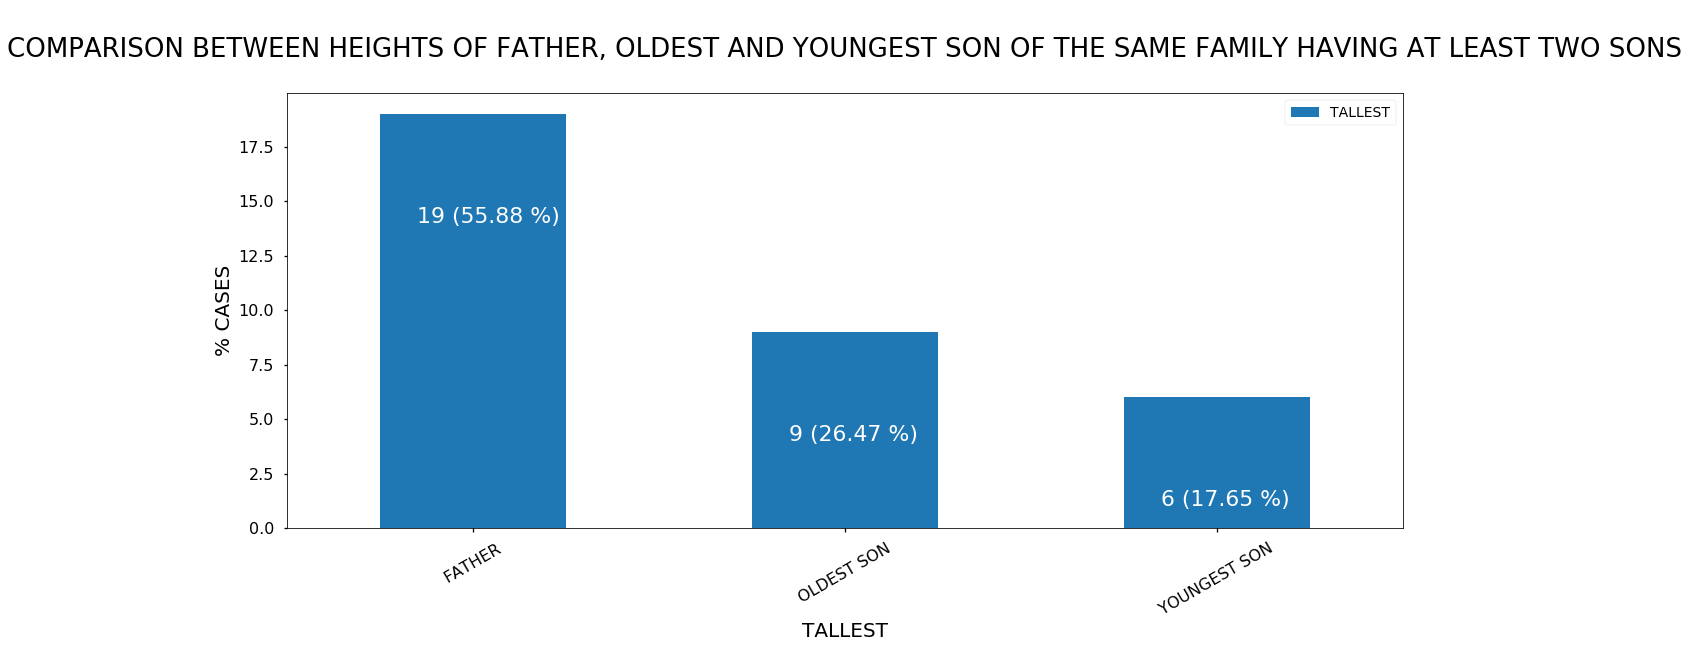

In [13]:
ax = td_f_df.plot(kind='bar',figsize=(20,8))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2))+' ('+str(round(p.get_height()/(tall_dict_father['YOUNGEST SON']+tall_dict_father['OLDEST SON']+tall_dict_father['FATHER'])*100,2))+' %)', (p.get_x()+0.1, p.get_height()-5), fontsize=22, color='w')
plt.xlabel('TALLEST',fontsize=20)
plt.ylabel('% CASES',fontsize=20)
plt.legend(fontsize=14)
plt.title('\nCOMPARISON BETWEEN HEIGHTS OF FATHER, OLDEST AND YOUNGEST SON OF THE SAME FAMILY HAVING AT LEAST TWO SONS\n',fontsize=26)
plt.xticks(fontsize=16,rotation=30)
plt.yticks(fontsize=16)
plt.show()

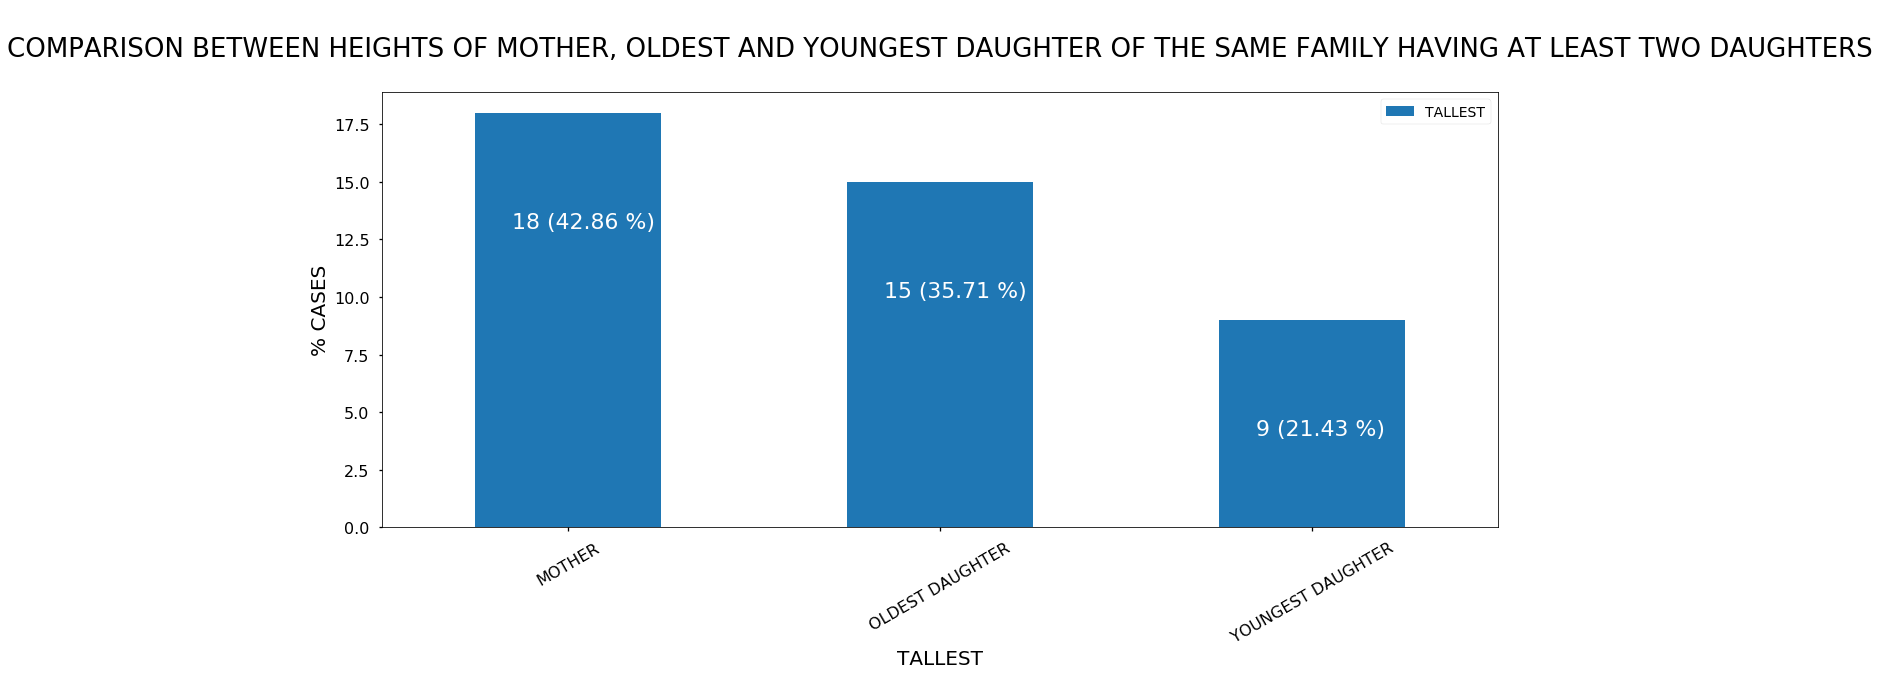

In [14]:
ax = td_m_df.plot(kind='bar',figsize=(20,8))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2))+' ('+str(round(p.get_height()/(tall_dict_mother['YOUNGEST DAUGHTER']+tall_dict_mother['OLDEST DAUGHTER']+tall_dict_mother['MOTHER'])*100,2))+' %)', (p.get_x()+0.1, p.get_height()-5), fontsize=22, color='w')
plt.xlabel('TALLEST',fontsize=20)
plt.ylabel('% CASES',fontsize=20)
plt.legend(fontsize=14)
plt.title('\nCOMPARISON BETWEEN HEIGHTS OF MOTHER, OLDEST AND YOUNGEST DAUGHTER OF THE SAME FAMILY HAVING AT LEAST TWO DAUGHTERS\n',fontsize=26)
plt.xticks(fontsize=16,rotation=30)
plt.yticks(fontsize=16)
plt.show()

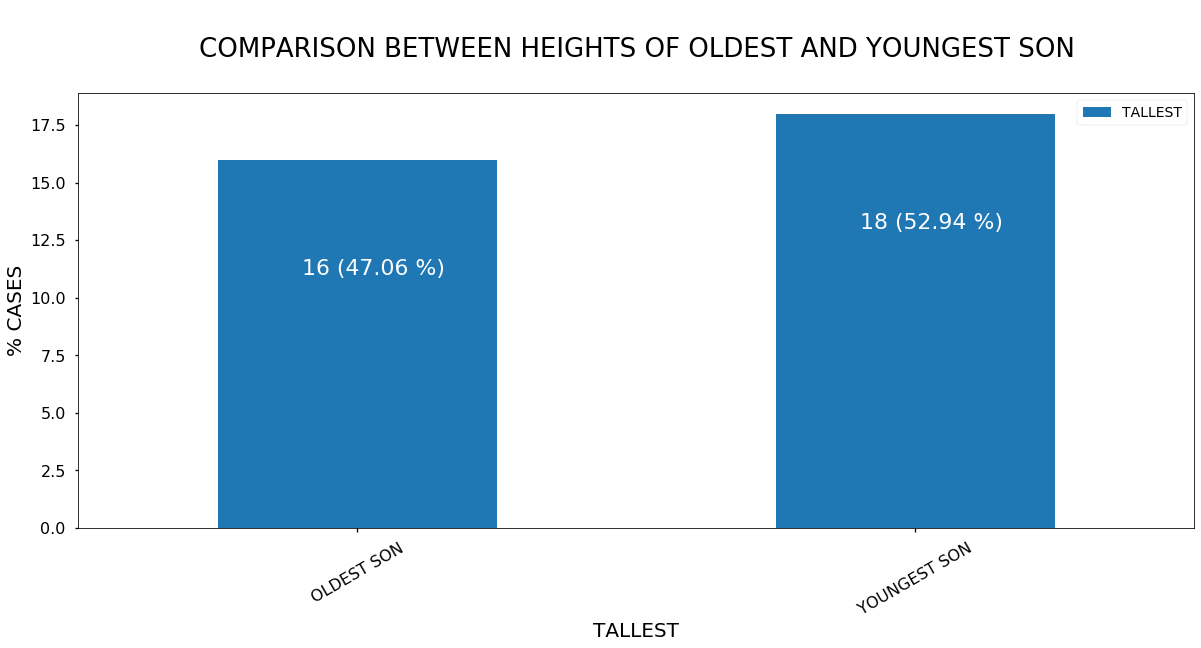

In [15]:
ax = oys_df.plot(kind='bar',figsize=(20,8))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2))+' ('+str(round(p.get_height()/(oys_dict['YOUNGEST SON']+oys_dict['OLDEST SON'])*100,2))+' %)', (p.get_x()+0.15, p.get_height()-5), fontsize=22, color='w')
plt.xlabel('TALLEST',fontsize=20)
plt.ylabel('% CASES',fontsize=20)
plt.legend(fontsize=14)
plt.title('\nCOMPARISON BETWEEN HEIGHTS OF OLDEST AND YOUNGEST SON\n',fontsize=26)
plt.xticks(fontsize=16,rotation=30)
plt.yticks(fontsize=16)
plt.show()

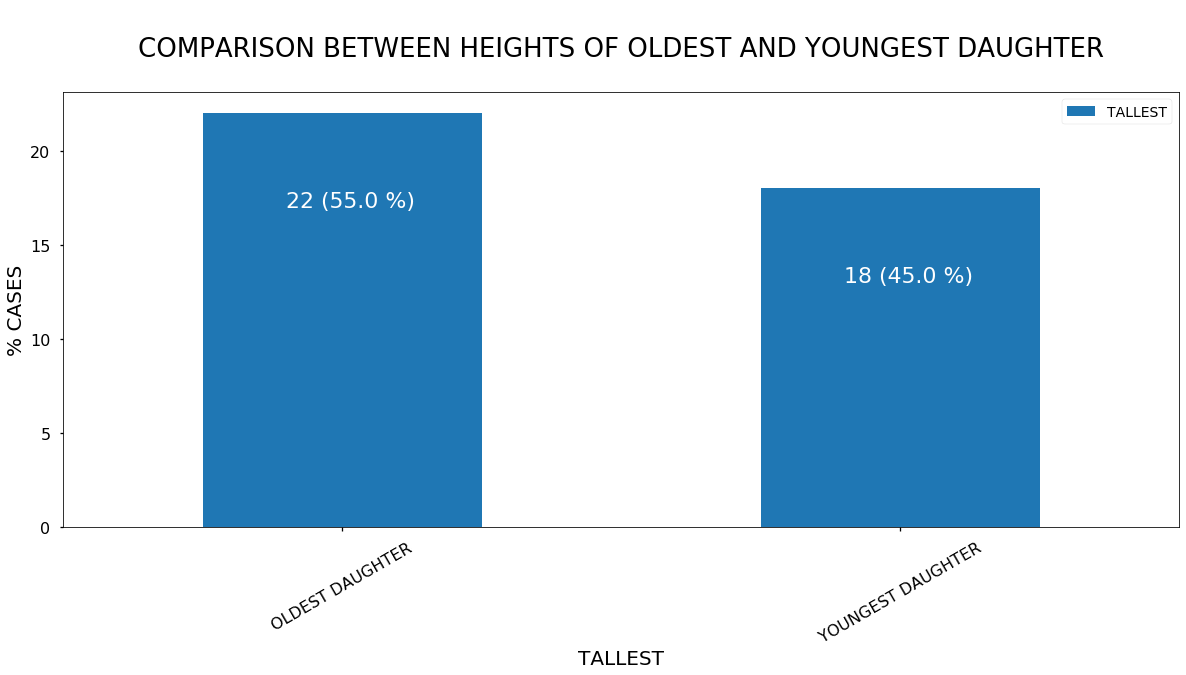

In [16]:
ax = oyd_df.plot(kind='bar',figsize=(20,8))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2))+' ('+str(round(p.get_height()/(oyd_dict['YOUNGEST DAUGHTER']+oyd_dict['OLDEST DAUGHTER'])*100,2))+' %)', (p.get_x()+0.15, p.get_height()-5), fontsize=22, color='w')
plt.xlabel('TALLEST',fontsize=20)
plt.ylabel('% CASES',fontsize=20)
plt.legend(fontsize=14)
plt.title('\nCOMPARISON BETWEEN HEIGHTS OF OLDEST AND YOUNGEST DAUGHTER\n',fontsize=26)
plt.xticks(fontsize=16,rotation=30)
plt.yticks(fontsize=16)
plt.show()

In [17]:
ysf_dict,osf_dict = dict(),dict()
ysf_dict['FATHER'],ysf_dict['YOUNGEST SON'],ysf_dict['EQUAL'],osf_dict['FATHER'],osf_dict['OLDEST SON'],osf_dict['EQUAL']=0,0,0,0,0,0
for i in range(len(s_oldest_list)):
    if df.loc[s_oldest_list[i][0],'FATHER'].HEIGHT.values[0] > s_oldest_list[i][3]:
        osf_dict['FATHER'] += 1
    elif df.loc[s_oldest_list[i][0],'FATHER'].HEIGHT.values[0] < s_oldest_list[i][3]:
        osf_dict['OLDEST SON'] += 1
    elif df.loc[s_oldest_list[i][0],'FATHER'].HEIGHT.values[0] == s_oldest_list[i][3]:
        osf_dict['EQUAL'] +=1
for i in range(len(s_youngest_list)):
    if df.loc[s_youngest_list[i][0],'FATHER'].HEIGHT.values[0] > s_youngest_list[i][3]:
        ysf_dict['FATHER'] += 1
    elif df.loc[s_youngest_list[i][0],'FATHER'].HEIGHT.values[0] < s_youngest_list[i][3]:
        ysf_dict['YOUNGEST SON'] += 1
    elif df.loc[s_youngest_list[i][0],'FATHER'].HEIGHT.values[0] == s_youngest_list[i][3]:
        ysf_dict['EQUAL'] +=1
        
ysf_df = (pd.DataFrame.from_dict(ysf_dict, orient='index').rename(columns={0:'TALLEST'}))
osf_df = (pd.DataFrame.from_dict(osf_dict, orient='index').rename(columns={0:'TALLEST'}))


ydm_dict,odm_dict = dict(),dict()
ydm_dict['MOTHER'],ydm_dict['YOUNGEST DAUGHTER'],ydm_dict['EQUAL'],odm_dict['MOTHER'],odm_dict['OLDEST DAUGHTER'],odm_dict['EQUAL']=0,0,0,0,0,0

for i in range(len(d_oldest_list)):
    if df.loc[d_oldest_list[i][0],'MOTHER'].HEIGHT.values[0] > d_oldest_list[i][3]:
        odm_dict['MOTHER'] += 1
    elif df.loc[d_oldest_list[i][0],'MOTHER'].HEIGHT.values[0] < d_oldest_list[i][3]:
        odm_dict['OLDEST DAUGHTER'] += 1
    elif df.loc[d_oldest_list[i][0],'MOTHER'].HEIGHT.values[0] == d_oldest_list[i][3]:
        odm_dict['EQUAL'] +=1
for i in range(len(d_youngest_list)):
    if df.loc[d_youngest_list[i][0],'MOTHER'].HEIGHT.values[0] > d_youngest_list[i][3]:
        ydm_dict['MOTHER'] += 1
    elif df.loc[d_youngest_list[i][0],'MOTHER'].HEIGHT.values[0] < d_youngest_list[i][3]:
        ydm_dict['YOUNGEST DAUGHTER'] += 1
    elif df.loc[d_youngest_list[i][0],'MOTHER'].HEIGHT.values[0] == d_youngest_list[i][3]:
        ydm_dict['EQUAL'] +=1

ydm_df = (pd.DataFrame.from_dict(ydm_dict, orient='index').rename(columns={0:'TALLEST'}))
odm_df = (pd.DataFrame.from_dict(odm_dict, orient='index').rename(columns={0:'TALLEST'}))

In [18]:
print(ysf_df)
print()
print(osf_df)
print()
print(ydm_df)
print()
print(odm_df)
print()

              TALLEST
FATHER             50
YOUNGEST SON       63
EQUAL              14

            TALLEST
FATHER           51
OLDEST SON       60
EQUAL            16

                   TALLEST
MOTHER                  52
YOUNGEST DAUGHTER       62
EQUAL                   11

                 TALLEST
MOTHER                45
OLDEST DAUGHTER       70
EQUAL                 10



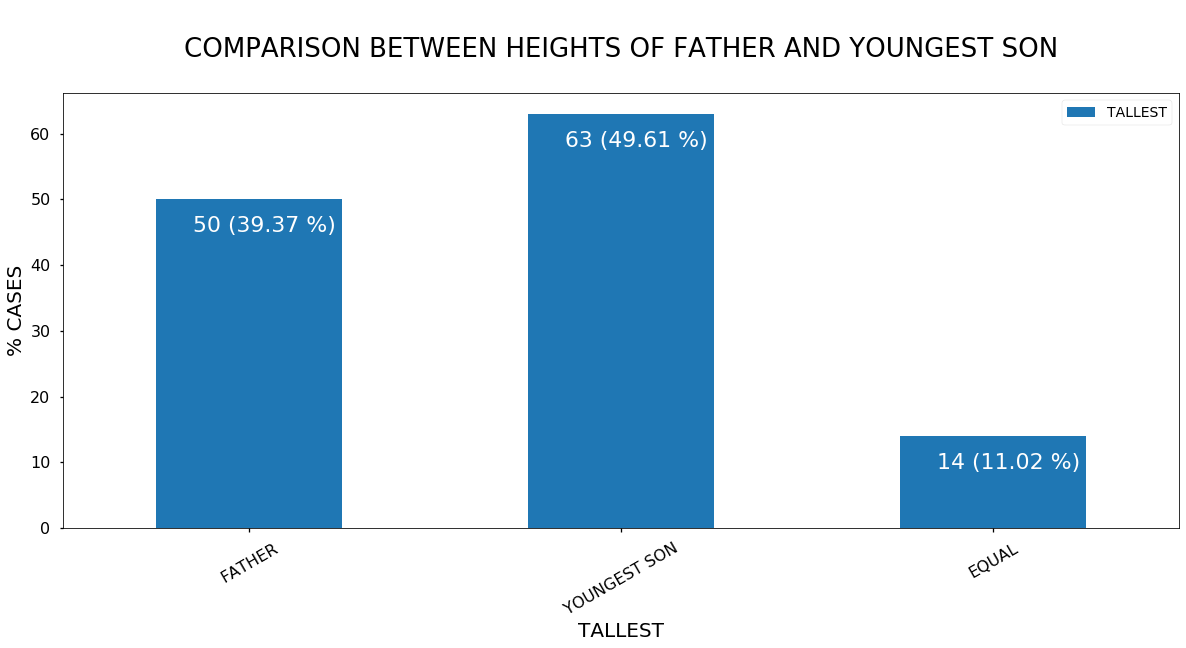

In [19]:
ax = ysf_df.plot(kind='bar',figsize=(20,8))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2))+' ('+str(round(p.get_height()/(ysf_dict['FATHER']+ysf_dict['YOUNGEST SON']+ysf_dict['EQUAL'])*100,2))+' %)', (p.get_x()+0.1, p.get_height()-5), fontsize=22, color='w')
plt.xlabel('TALLEST',fontsize=20)
plt.ylabel('% CASES',fontsize=20)
plt.legend(fontsize=14)
plt.title('\nCOMPARISON BETWEEN HEIGHTS OF FATHER AND YOUNGEST SON\n',fontsize=26)
plt.xticks(fontsize=16,rotation=30)
plt.yticks(fontsize=16)
plt.show()

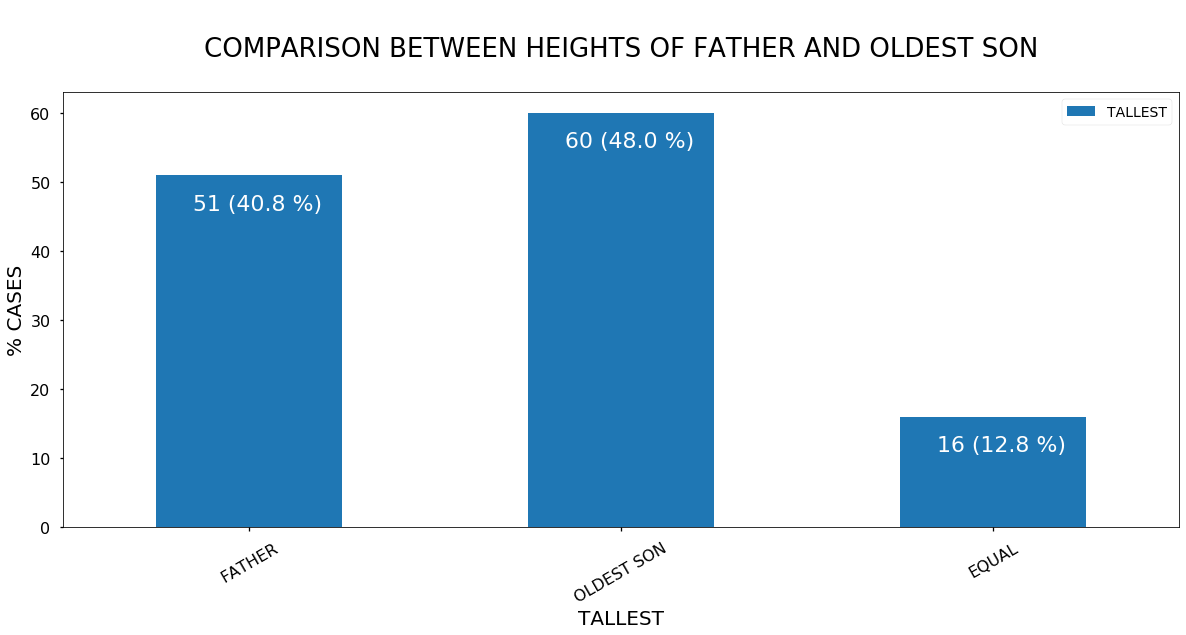

In [20]:
ax = osf_df.plot(kind='bar',figsize=(20,8))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2))+' ('+str(round(p.get_height()/(osf_dict['FATHER']+osf_dict['OLDEST SON']+ysf_dict['EQUAL'])*100,2))+' %)', (p.get_x()+0.1, p.get_height()-5), fontsize=22, color='w')
plt.xlabel('TALLEST',fontsize=20)
plt.ylabel('% CASES',fontsize=20)
plt.legend(fontsize=14)
plt.title('\nCOMPARISON BETWEEN HEIGHTS OF FATHER AND OLDEST SON\n',fontsize=26)
plt.xticks(fontsize=16,rotation=30)
plt.yticks(fontsize=16)
plt.show()

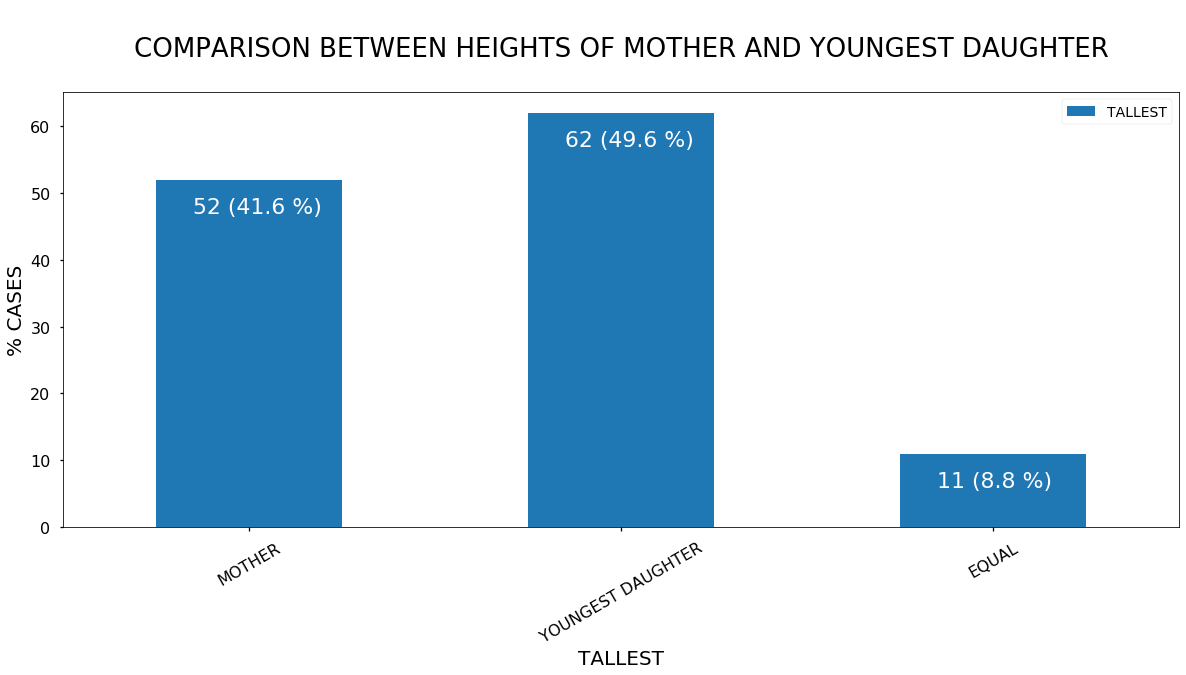

In [21]:
ax = ydm_df.plot(kind='bar',figsize=(20,8))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2))+' ('+str(round(p.get_height()/(ydm_dict['MOTHER']+ydm_dict['YOUNGEST DAUGHTER']+ydm_dict['EQUAL'])*100,2))+' %)', (p.get_x()+0.1, p.get_height()-5), fontsize=22, color='w')
plt.xlabel('TALLEST',fontsize=20)
plt.ylabel('% CASES',fontsize=20)
plt.legend(fontsize=14)
plt.title('\nCOMPARISON BETWEEN HEIGHTS OF MOTHER AND YOUNGEST DAUGHTER\n',fontsize=26)
plt.xticks(fontsize=16,rotation=30)
plt.yticks(fontsize=16)
plt.show()

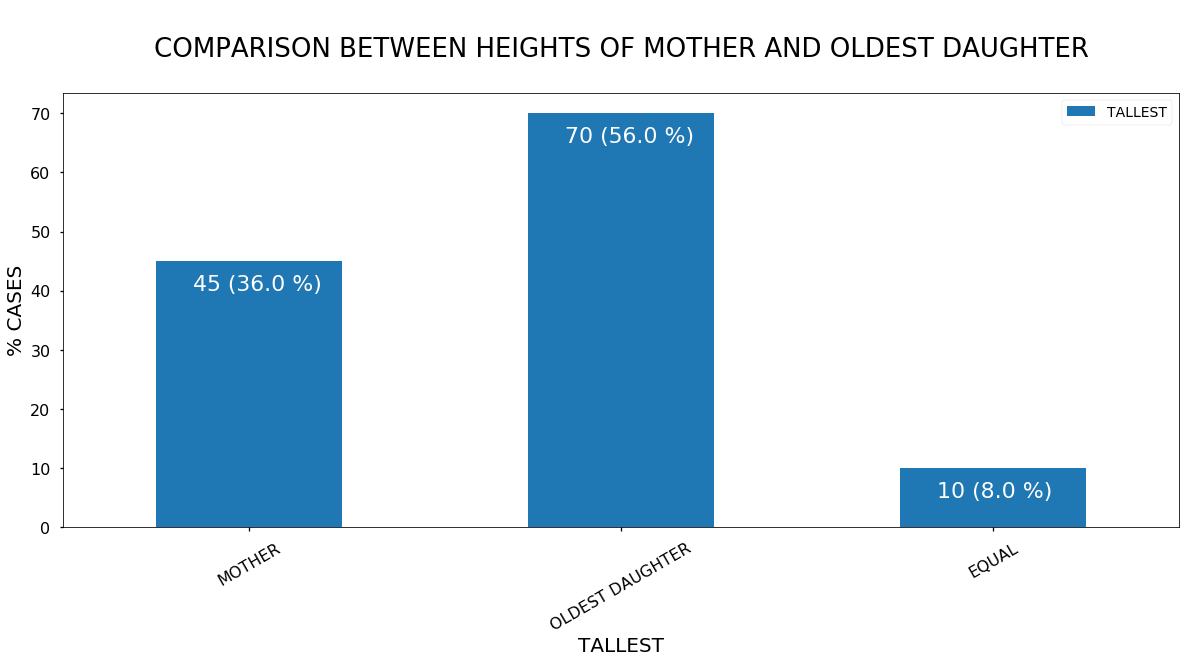

In [22]:
ax = odm_df.plot(kind='bar',figsize=(20,8))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2))+' ('+str(round(p.get_height()/(odm_dict['MOTHER']+odm_dict['OLDEST DAUGHTER']+odm_dict['EQUAL'])*100,2))+' %)', (p.get_x()+0.1, p.get_height()-5), fontsize=22, color='w')
plt.xlabel('TALLEST',fontsize=20)
plt.ylabel('% CASES',fontsize=20)
plt.legend(fontsize=14)
plt.title('\nCOMPARISON BETWEEN HEIGHTS OF MOTHER AND OLDEST DAUGHTER\n',fontsize=26)
plt.xticks(fontsize=16,rotation=30)
plt.yticks(fontsize=16)
plt.show()

In [23]:
tall_dict_parents = dict()
tall_dict_parents['MOTHER'],tall_dict_parents['FATHER']=0,0

for i in range(df.index.max()[0]):
    if df.loc[i+1,'MOTHER'].HEIGHT.values[0] < df.loc[i+1,'FATHER'].HEIGHT.values[0]:
        tall_dict_parents['FATHER'] += 1
    else:
        tall_dict_parents['MOTHER'] += 1
td_p_df = (pd.DataFrame.from_dict(tall_dict_parents, orient='index').rename(columns={0:'TALLEST'}))

td_p_df

,TALLEST
MOTHER,17
FATHER,146


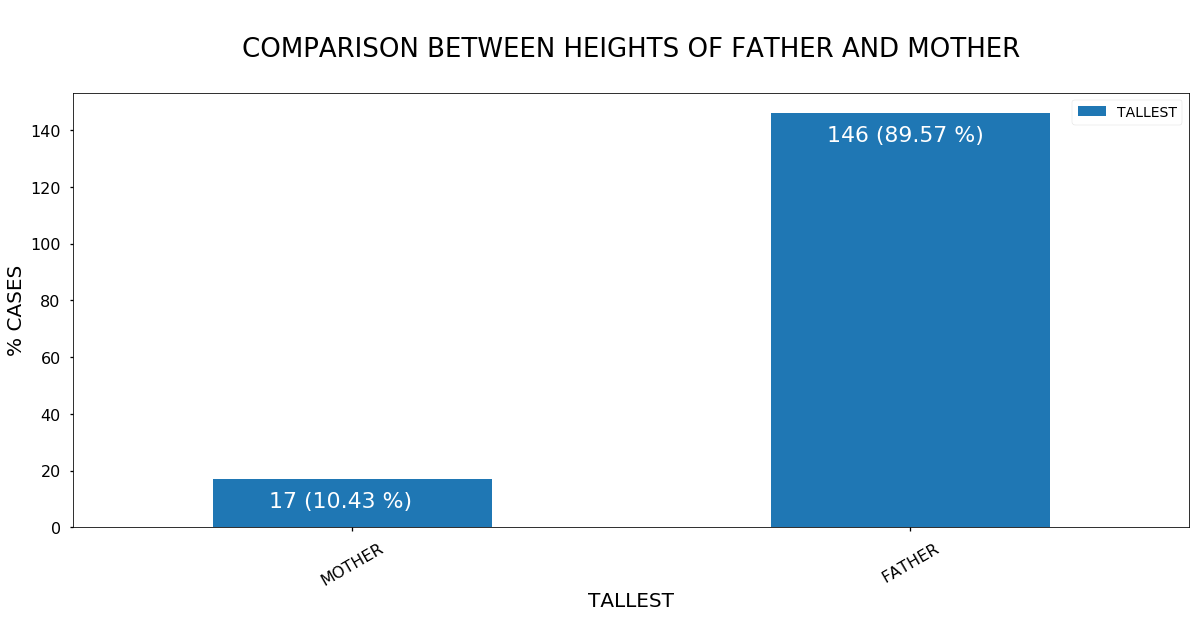

In [24]:
ax = td_p_df.plot(kind='bar',figsize=(20,8))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2))+' ('+str(round(p.get_height()/(tall_dict_parents['FATHER']+tall_dict_parents['MOTHER'])*100,2))+' %)', (p.get_x()+0.1, p.get_height()-10), fontsize=22, color='w')
plt.xlabel('TALLEST',fontsize=20)
plt.ylabel('% CASES',fontsize=20)
plt.legend(fontsize=14)
plt.title('\nCOMPARISON BETWEEN HEIGHTS OF FATHER AND MOTHER\n',fontsize=26)
plt.xticks(fontsize=16,rotation=30)
plt.yticks(fontsize=16)
plt.show()

## **CONCLUSION**

<hr>

|                       | FATHER | YOUNGEST SON | EQUAL |
|:---------------------:|:------:|:----------:|:-----:|
| **TALLEST (% cases)** |  39.37 |    49.61   | 11.02 |

<hr>

|                       | FATHER | OLDEST SON | EQUAL |
|:---------------------:|:------:|:----------:|:-----:|
| **TALLEST (% cases)** |  40.16 |    47.24   | 12.6 |

<hr>

|                       | MOTHER | YOUNGEST DAUGHTER | EQUAL |
|:---------------------:|:------:|:----------:|:-----:|
| **TALLEST (% cases)** |  37.7 |    51.64   | 10.66 |

<hr>

|                       | MOTHER | OLDEST DAUGHTER | EQUAL |
|:---------------------:|:------:|:----------:|:-----:|
| **TALLEST (% cases)** |  34.43 |    57.38  | 8.2 |

<hr>

|                       | OLDEST SON | YOUNGEST SON |
|:---------------------:|:------:|:----------:|
| **TALLEST (% cases)** |  47.06 |    52.94   |

<hr>

|                       | OLDEST DAUGHTER | YOUNGEST DAUGHTER |
|:---------------------:|:------:|:----------:|
| **TALLEST (% cases)** |  55.00 |    45.00   |

<hr>

|                       | FATHER | MOTHER |
|:---------------------:|:------:|:----------:|
| **TALLEST (% cases)** |  89.57 |    10.43   |

<hr>

### SOME POINTS TO BE NOTED:

1. For a family having only one son and / or daughter, the corresponding values for "oldest" and "youngest" sons and / or daughters in that family are same.
1. In the analysis for "oldest" vs "youngest" son / daughter, majority of heights are equal which may be due to the above factor.

To deal with the above issues for an even better analysis, we need to prepare our data in such a way that each and every member of a family is distinguishable as a unique entity even in the case where their ages and heights are same.

Also, only those family members have been considered in the analysis whose age is 18 years or above.